In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.fft import rfft, rfftfreq 
from scipy import signal
from scipy.fft import fftshift

In [2]:
#df = pd.read_csv("C:/Users/JackC/Documents/TU Delft/BAP/Measurements/Blinking.csv", sep=",")
#df = pd.read_csv("C:/Users/JackC/Documents/TU Delft/BAP/Measurements/Physcial clincing right forearm.csv", sep=",")
df = pd.read_csv("C:/Users/JackC/Documents/GitHub/EEGcontroller/MeasurementSubgroup/Our_measurements/Measurement_prompt/EEGdata-2024-149--15-57-42.csv", sep=",")
#df = pd.read_csv("C:/Users/JackC/Documents/GitHub/EEGcontroller/MeasurementSubgroup/Our_measurements/Measurement_prompt_labels/Label_2024-144--15-54-35_1.csv", sep=",")
#df = pd.read_csv("C:/Users/JackC/Documents/GitHub/EEGcontroller/MeasurementSubgroup/Our_measurements/Measurement_Test/Label0Test.csv", sep=",")
end = df.shape[0] - 5
fs = 250
df = df.iloc[:end, :8] # 3000 samples is 12 seconds of data
df

,FZ,C3,CZ,C4,PZ,PO7,OZ,PO8
0,241143.687500,249767.171875,331137.09375,296372.437500,217886.687500,239983.093750,234067.562500,223020.359375
1,241125.890625,249780.578125,331155.15625,296362.593750,217963.500000,239978.265625,234171.375000,223012.218750
2,241097.187500,249712.187500,331091.84375,296317.437500,217839.484375,239953.406250,234010.171875,223004.437500
3,241102.828125,249663.546875,331035.53125,296300.468750,217696.437500,239940.265625,233823.750000,223005.875000
4,241117.750000,249682.671875,331043.46875,296321.656250,217714.578125,239950.812500,233843.250000,223009.984375
...,...,...,...,...,...,...,...,...
71995,240581.843750,249069.531250,278685.06250,259517.718750,216931.015625,239204.984375,232971.625000,222040.546875
71996,240605.187500,249099.031250,278699.09375,259542.750000,216947.031250,239225.093750,232983.421875,222047.609375
71997,240618.953125,249170.375000,278769.90625,259585.484375,217115.734375,239255.671875,233209.000000,222059.765625
71998,240602.140625,249188.343750,278801.18750,259586.203125,217208.546875,239251.562500,233339.796875,222059.046875


In [3]:
# Define the segment size
prompt_size = 1500
prompts = end/prompt_size

for i in range(int(prompts)):
    df.iloc[1500*i : 1500*(i+1)] = signal.detrend(df.iloc[1500*i : 1500*(i+1)], axis = 0)

df_filt_detr = np.array(df)

In [8]:
from scipy.signal import butter, lfilter, lfilter_zi
from scipy import signal

# Define the filter parameters
lowcut = 2
highcut = 30
fs = 250  # Sampling frequency

# Calculate the filter coefficients
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = butter(8, [low, high], btype='band')

# Apply the filter to each column of the DataFrame
df_filt = lfilter(b, a, df_filt_detr, axis = 0)

# import scipy.signal as signal

# Define the notch filter parameters
fs = 250  # Sampling frequency
f0 = 50  # Notch frequency
Q = 1 # Quality factor

# Design the notch filter
b, a = signal.iirnotch(f0, Q, fs)

# Apply the filter to each column of the DataFrame
df_filt1 = lfilter(b, a, df_filt, axis = 0)

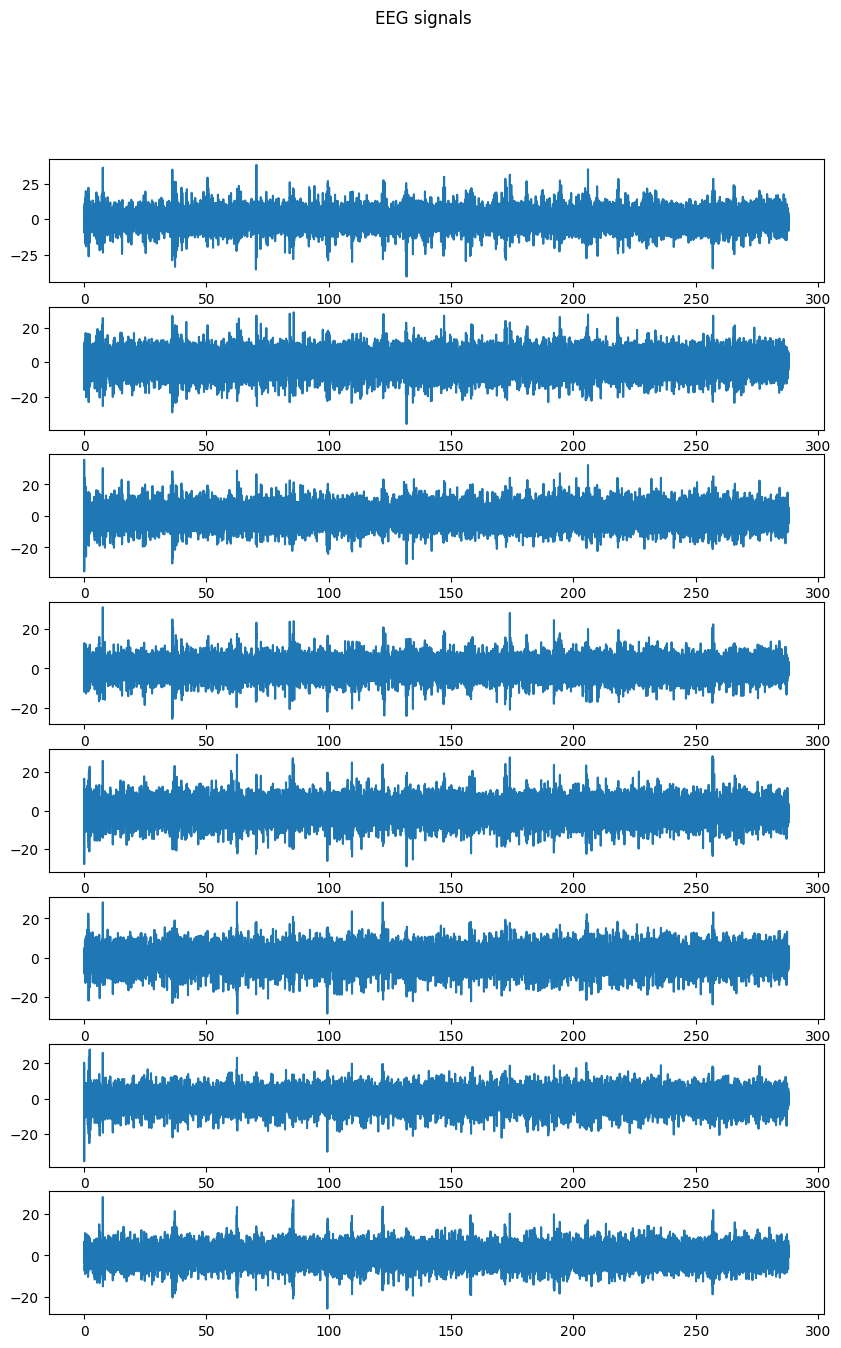

In [9]:
x1 = np.linspace(0, end/fs, end, endpoint=True)

fig, axs = plt.subplots(8, figsize=(10 , 15))
fig.suptitle('EEG signals')
for i in range(8):
    axs[i].plot(x1,df_filt1[:,i])

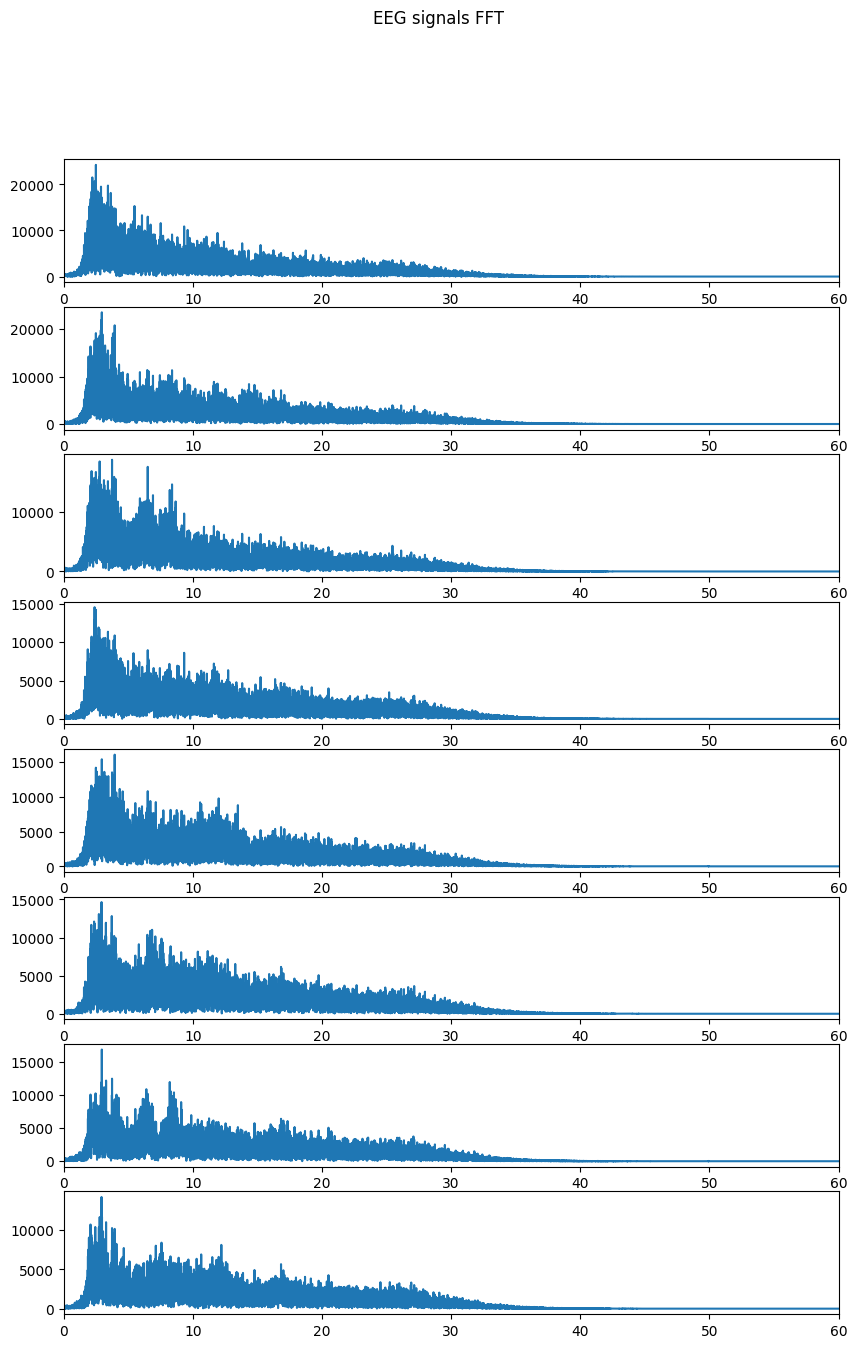

In [10]:
xf = rfftfreq(end, 1 / fs)

fig, axs = plt.subplots(8, figsize=(10 , 15))
fig.suptitle('EEG signals FFT')
for i in range(8):
    yf = rfft(df_filt1[:,i])
    axs[i].plot(xf, np.abs(yf))
    axs[i].set_xlim([0, 60])
    # Setting the number of ticks 
    axs[i].locator_params(axis='x', nbins=10)
    

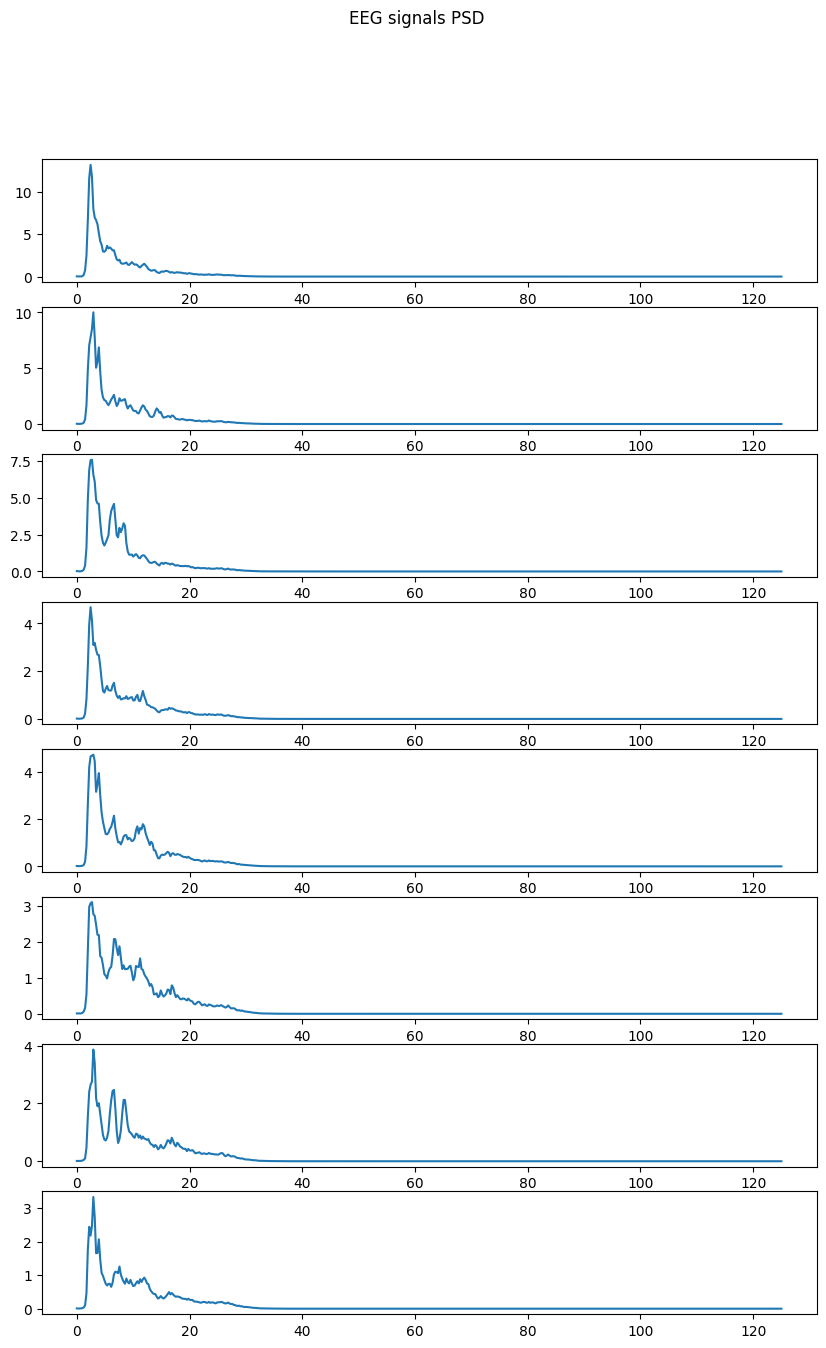

In [11]:
from scipy import signal

xf = rfftfreq(end, 1 / fs)

fig, axs = plt.subplots(8, figsize=(10 , 15))
fig.suptitle('EEG signals PSD')
for i in range(8):
    # Compute the power spectral density
    frequencies, power_density = signal.welch(df_filt1[:,i], fs, nperseg=1024, scaling='density')


    # Plot the power spectral density
    axs[i].plot(frequencies, power_density)
    #plt.psd(df[:,i], Fs = 250)
    #axs[i].xlabel('Frequency (Hz)')
    #axs[i].ylabel('Power Spectral Density')
    #axs[i].title('Power Spectral Density Plot')


